

Description

age - age in years

sex - Male or Female

cp - chest pain type

trestbps - resting blood pressure (in mm Hg)

chol - serum cholestoral in mg/dl

fbs - (fasting blood sugar > 120 mg/dl) (True or False)

restecg - resting electrocardiographic results

thalach - maximum heart rate achieved

exang - exercise induced angina (True or False)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment

ca - number of major vessels (0-3) colored by flourosopy

thal - A blood disorder called thalassemia

target - have disease or not

Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the Data

In [3]:
data=pd.read_csv('heart_disease_uci.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


Dropping unneccesary columns

In [5]:
data.columns
data=data.drop(['id','dataset'],axis=1)

In [6]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,56,Male,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,62,Female,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,57,Female,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,63,Male,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,53,Male,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


Data Cleaning and Feature selection

In [7]:
data['num']=data['num'].apply(lambda x:1 if x!=0 else 0)

In [8]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,56,Male,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,62,Female,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,1
7,57,Female,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,63,Male,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,1
9,53,Male,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


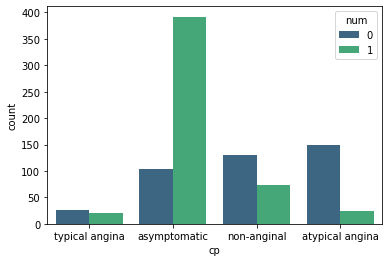

In [9]:
sns.countplot(data['cp'],hue=data['num'],palette='viridis')

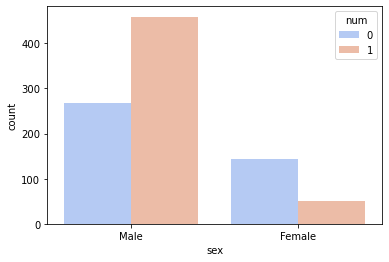

In [10]:
sns.countplot(data['sex'],hue=data['num'],palette='coolwarm')

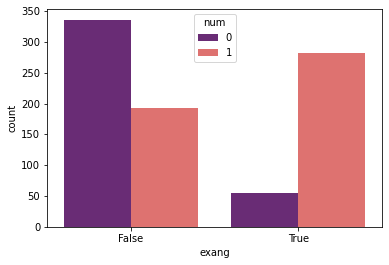

In [11]:
sns.countplot(data['exang'],hue=data['num'],palette='magma')

In [12]:
data["restecg"].replace({"lv hypertrophy": "lv_hypertrophy","st-t abnormality": "stt_abnormality" }, inplace=True)
data['thal'].replace({'fixed defect':'fixed_defect' , 'reversable defect': 'reversable_defect' }, inplace =True)
data['cp'].replace({'typical angina':'typical_angina', 'atypical angina': 'atypical_angina' }, inplace =True)

In [13]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 
              'cholesterol', 'fasting_blood_sugar','resting_electrocardiographic_results',
              'max_heart_rate_achieved', 'exercise_induced_angina', 
              'st_depression', 'st_slope_type', 'num_major_vessels', 
              'thalassemia_type', 'target']

In [14]:
data['sex'] = data['sex'].apply(lambda x:1 if x=='Male' else 0)

In [15]:
data['fasting_blood_sugar']=data['fasting_blood_sugar'].apply(lambda x:1 if x==True else 0)

In [16]:
data['exercise_induced_angina']=data['exercise_induced_angina'].apply(lambda x:1 if x==True else 0)

In [17]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,63,1,typical_angina,145.0,233.0,1,lv_hypertrophy,150.0,0,2.3,downsloping,0.0,fixed_defect,0
1,67,1,asymptomatic,160.0,286.0,0,lv_hypertrophy,108.0,1,1.5,flat,3.0,normal,1
2,67,1,asymptomatic,120.0,229.0,0,lv_hypertrophy,129.0,1,2.6,flat,2.0,reversable_defect,1
3,37,1,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,normal,0
4,41,0,atypical_angina,130.0,204.0,0,lv_hypertrophy,172.0,0,1.4,upsloping,0.0,normal,0


In [18]:
data[(data['target']==1)&(data['max_heart_rate_achieved']>150)]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
6,62,0,asymptomatic,140.0,268.0,0,lv_hypertrophy,160.0,0,3.6,downsloping,2.0,normal,1
9,53,1,asymptomatic,140.0,203.0,1,lv_hypertrophy,155.0,1,3.1,downsloping,0.0,reversable_defect,1
16,48,1,atypical_angina,110.0,229.0,0,normal,168.0,0,1.0,downsloping,0.0,reversable_defect,1
22,58,1,atypical_angina,120.0,284.0,0,lv_hypertrophy,160.0,0,1.8,flat,0.0,normal,1
23,58,1,non-anginal,132.0,224.0,0,lv_hypertrophy,173.0,0,3.2,upsloping,2.0,reversable_defect,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,40,1,asymptomatic,125.0,0.0,1,normal,165.0,0,0.0,NaN,NaN,reversable_defect,1
850,48,1,non-anginal,132.0,220.0,1,stt_abnormality,162.0,0,0.0,NaN,NaN,fixed_defect,1
868,57,1,asymptomatic,144.0,270.0,1,stt_abnormality,160.0,1,2.0,flat,NaN,NaN,1
885,48,1,asymptomatic,140.0,NaN,0,normal,159.0,1,1.5,upsloping,NaN,NaN,1


In [19]:
data['heart_rate']=data['max_heart_rate_achieved'].apply(lambda x:1 if x>150 else 0)

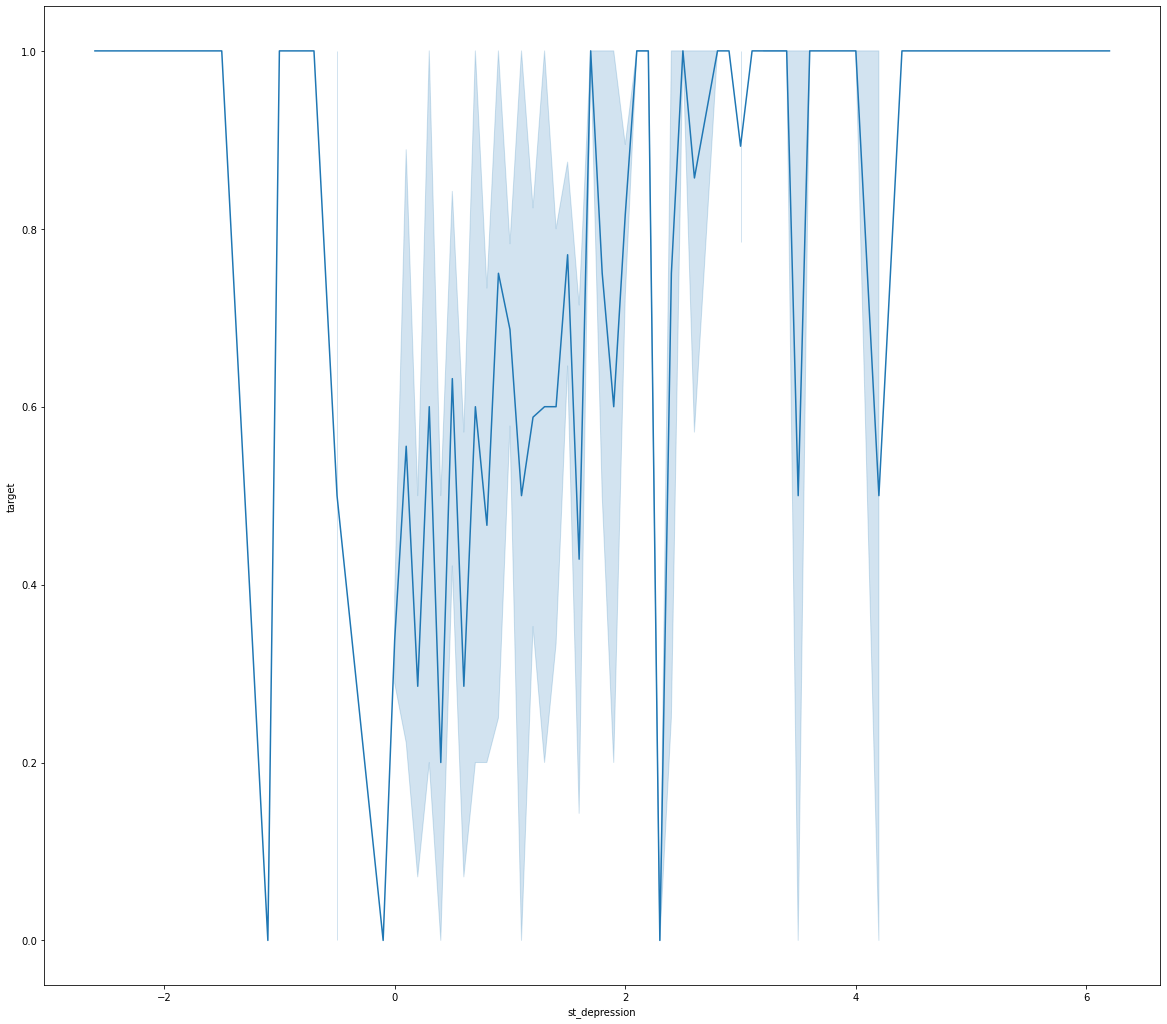

In [20]:
plt.figure(figsize=(20,18))
sns.lineplot(x=data['st_depression'],y=data['target'])

Checking for Null values

In [21]:
data.dropna(inplace = True)
data.count()

age                                     299
sex                                     299
chest_pain_type                         299
resting_blood_pressure                  299
cholesterol                             299
fasting_blood_sugar                     299
resting_electrocardiographic_results    299
max_heart_rate_achieved                 299
exercise_induced_angina                 299
st_depression                           299
st_slope_type                           299
num_major_vessels                       299
thalassemia_type                        299
target                                  299
heart_rate                              299
dtype: int64

In [22]:
data['thalassemia_type'].value_counts()

normal               164
reversable_defect    117
fixed_defect          18
Name: thalassemia_type, dtype: int64

Converting categorical variable into dummy/indicator variables

In [23]:
data = pd.get_dummies(data, drop_first=False)
data.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'heart_rate', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical_angina', 'chest_pain_type_non-anginal',
       'chest_pain_type_typical_angina',
       'resting_electrocardiographic_results_lv_hypertrophy',
       'resting_electrocardiographic_results_normal',
       'resting_electrocardiographic_results_stt_abnormality',
       'st_slope_type_downsloping', 'st_slope_type_flat',
       'st_slope_type_upsloping', 'thalassemia_type_fixed_defect',
       'thalassemia_type_normal', 'thalassemia_type_reversable_defect'],
      dtype='object')

Variance

In [24]:
data.var()

age                                                       81.545667
sex                                                        0.218716
resting_blood_pressure                                   314.982672
cholesterol                                             2759.672151
fasting_blood_sugar                                        0.123544
max_heart_rate_achieved                                  534.583489
exercise_induced_angina                                    0.222217
st_depression                                              1.352033
num_major_vessels                                          0.878791
target                                                     0.249602
heart_rate                                                 0.249355
chest_pain_type_asymptomatic                               0.250499
chest_pain_type_atypical_angina                            0.137483
chest_pain_type_non-anginal                                0.201208
chest_pain_type_typical_angina                  

In [25]:
data['resting_blood_pressure']=np.log(data['resting_blood_pressure'])
data['cholesterol']=np.log(data['cholesterol'])
data['max_heart_rate_achieved']=np.log(data['max_heart_rate_achieved'])

np.var(data[["resting_blood_pressure",'cholesterol','max_heart_rate_achieved']])

resting_blood_pressure     0.017290
cholesterol                0.043871
max_heart_rate_achieved    0.027690
dtype: float64

In [26]:
data.var()

age                                                     81.545667
sex                                                      0.218716
resting_blood_pressure                                   0.017348
cholesterol                                              0.044018
fasting_blood_sugar                                      0.123544
max_heart_rate_achieved                                  0.027783
exercise_induced_angina                                  0.222217
st_depression                                            1.352033
num_major_vessels                                        0.878791
target                                                   0.249602
heart_rate                                               0.249355
chest_pain_type_asymptomatic                             0.250499
chest_pain_type_atypical_angina                          0.137483
chest_pain_type_non-anginal                              0.201208
chest_pain_type_typical_angina                           0.071244
resting_el

Correlation

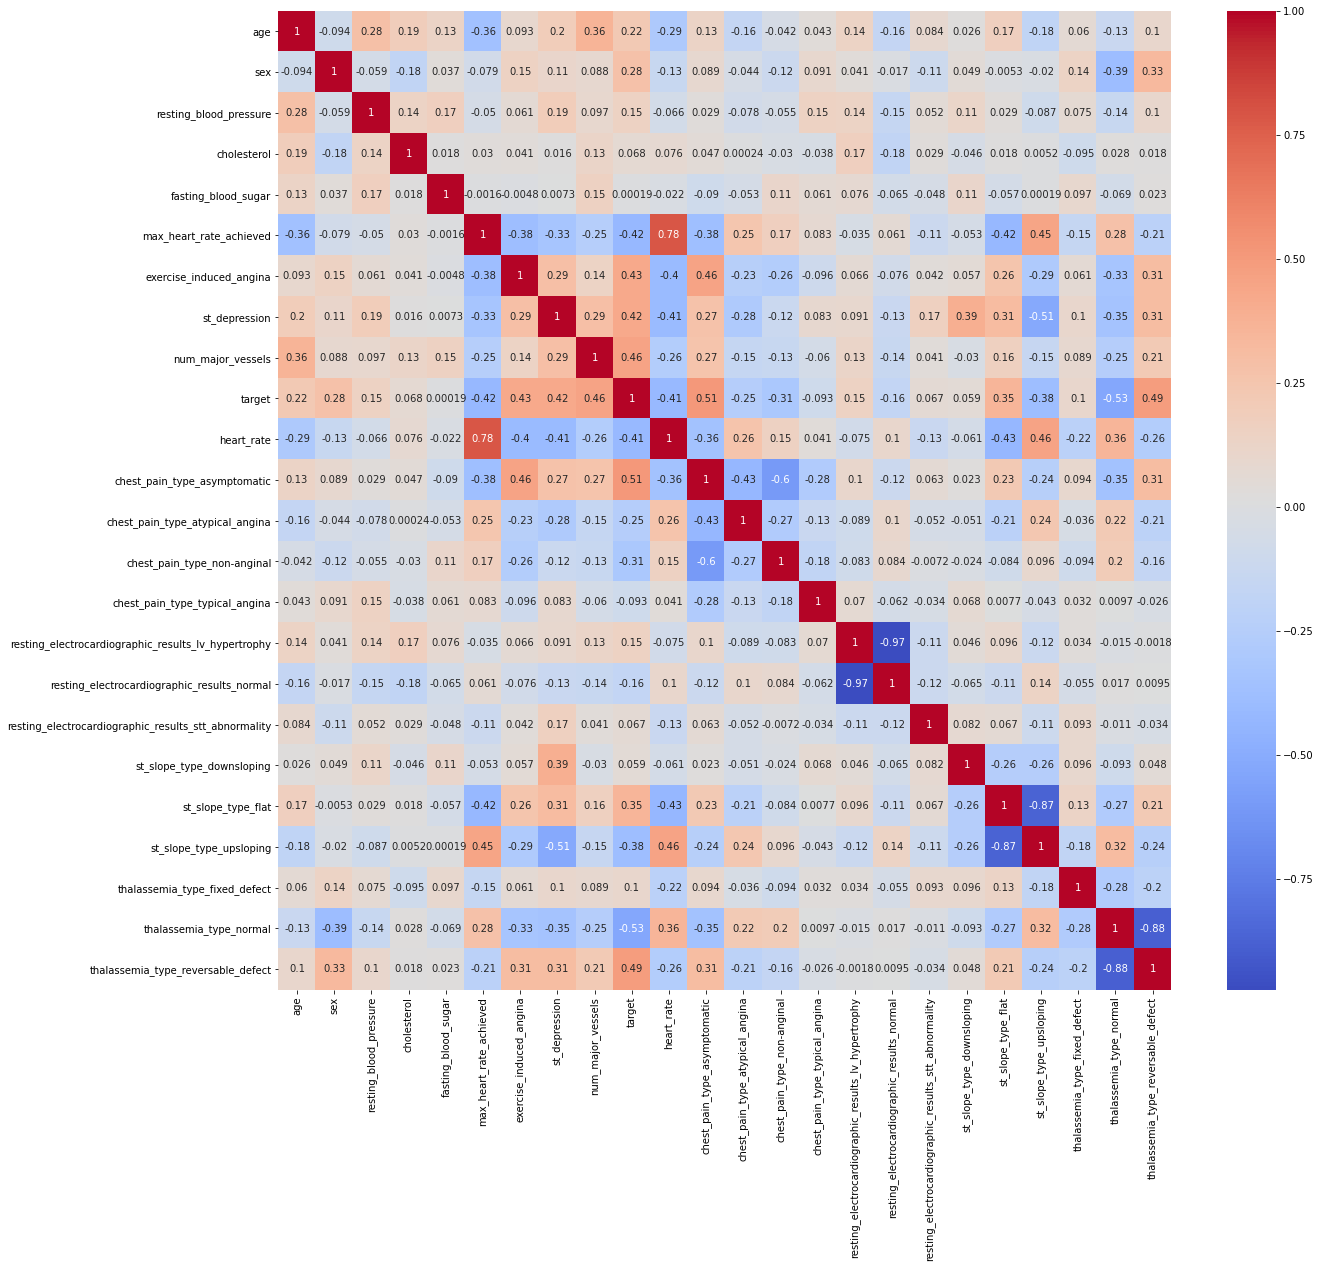

In [27]:
plt.figure(figsize=(20,18))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

In [28]:
data['target'].unique()

array([0, 1], dtype=int64)

In [29]:
cor[cor['target'] > 0.25]['target'].sort_values()

sex                                   0.281912
st_slope_type_flat                    0.354676
st_depression                         0.424947
exercise_induced_angina               0.427123
num_major_vessels                     0.455398
thalassemia_type_reversable_defect    0.489250
chest_pain_type_asymptomatic          0.510728
target                                1.000000
Name: target, dtype: float64

In [30]:
data.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'heart_rate', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical_angina', 'chest_pain_type_non-anginal',
       'chest_pain_type_typical_angina',
       'resting_electrocardiographic_results_lv_hypertrophy',
       'resting_electrocardiographic_results_normal',
       'resting_electrocardiographic_results_stt_abnormality',
       'st_slope_type_downsloping', 'st_slope_type_flat',
       'st_slope_type_upsloping', 'thalassemia_type_fixed_defect',
       'thalassemia_type_normal', 'thalassemia_type_reversable_defect'],
      dtype='object')

Train Test Split

In [31]:
X = data[['exercise_induced_angina','st_depression','num_major_vessels','chest_pain_type_asymptomatic','st_slope_type_flat','thalassemia_type_reversable_defect']]
y = data['target']

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (200, 6)
Shape of y_train: (200,)
Shape of X_test: (99, 6)
Shape of y_test: (99,)


Normalization

In [34]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

Logistic Regression

In [35]:
Log = LogisticRegression()

Log.fit(X_train,y_train)

predictions = Log.predict(X_test)

print(confusion_matrix(y_test,predictions))
print('\n')
print("{} model accuracy: {}".format(Log, np.mean(cross_val_score(estimator=Log, X=X_train, y=y_train, cv=10), axis = 0)))

[[46  7]
 [11 35]]


LogisticRegression() model accuracy: 0.8550000000000001


Multi Layer Perceptron

In [36]:
MLP = MLPClassifier()
MLP.fit(X_train,y_train)
predictions = MLP.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print("{} model accuracy: {}".format(MLP, np.mean(cross_val_score(estimator=MLP, X=X_train, y=y_train, cv=10), axis = 0)))

C:\Users\varshik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[[47  6]
 [13 33]]




C:\Users\varshik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\varshik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\varshik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\varshik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\varshik\anaconda3\lib\site-packages\sklearn\neural_netw

MLPClassifier() model accuracy: 0.85


C:\Users\varshik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Random Forest

In [37]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
predictions = RF.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print("{} model accuracy: {}".format(RF, np.mean(cross_val_score(estimator=RF, X=X_train, y=y_train, cv=10), axis = 0)))

[[48  5]
 [16 30]]


RandomForestClassifier() model accuracy: 0.8099999999999999


Decision Tree

In [38]:
DT = tree.DecisionTreeClassifier()
DT.fit(X_train,y_train)
predictions = DT.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print("{} model accuracy: {}".format(DT, np.mean(cross_val_score(estimator=DT, X=X_train, y=y_train, cv=10), axis = 0)))

[[47  6]
 [13 33]]


DecisionTreeClassifier() model accuracy: 0.7649999999999999


K Nearest Neighbors

In [39]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
predictions = KNN.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print("{} model accuracy: {}".format(KNN, np.mean(cross_val_score(estimator=KNN, X=X_train, y=y_train, cv=10), axis = 0)))

[[47  6]
 [10 36]]


KNeighborsClassifier() model accuracy: 0.8099999999999999


Support Vector Machine

In [40]:
SV = SVC()
SV.fit(X_train,y_train)
predictions = SV.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print("{} model accuracy: {}".format(SV, np.mean(cross_val_score(estimator=SV, X=X_train, y=y_train, cv=10), axis = 0)))

[[46  7]
 [13 33]]


SVC() model accuracy: 0.8299999999999998


In [41]:
test = pd.read_csv('test.csv')

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 0:
asymptomatic)

trestbps: The person's resting blood pressure in mm Hg
chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or 

definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (1 = fixed defect; 2 = normal; 3 = reversable defect)

target: Heart disease (0 = yes, 1 = no)

In [42]:
test.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,0
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,0
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,0
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,0
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,0


In [43]:
test.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 
              'cholesterol', 'fasting_blood_sugar','resting_electrocardiographic_results',
              'max_heart_rate_achieved', 'exercise_induced_angina', 
              'st_depression', 'st_slope_type', 'num_major_vessels', 
              'thalassemia_type', 'target']

In [44]:
data.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'heart_rate', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical_angina', 'chest_pain_type_non-anginal',
       'chest_pain_type_typical_angina',
       'resting_electrocardiographic_results_lv_hypertrophy',
       'resting_electrocardiographic_results_normal',
       'resting_electrocardiographic_results_stt_abnormality',
       'st_slope_type_downsloping', 'st_slope_type_flat',
       'st_slope_type_upsloping', 'thalassemia_type_fixed_defect',
       'thalassemia_type_normal', 'thalassemia_type_reversable_defect'],
      dtype='object')

In [45]:
test['heart_rate']=test['max_heart_rate_achieved'].apply(lambda x:1 if x>150 else 0)

In [46]:
test['chest_pain_type_asymptomatic'] = test['chest_pain_type'].apply(lambda x:1 if x==0 else 0)
test['st_slope_type_flat'] = test['st_slope_type'].apply(lambda x:1 if x==2 else 0 )
test['thalassemia_type_reversable_defect'] = test['thalassemia_type'].apply(lambda x:1 if x==3 else 0)

In [47]:
test[test['target']==1].head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target,heart_rate,chest_pain_type_asymptomatic,st_slope_type_flat,thalassemia_type_reversable_defect
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,1,0,1,0,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,1,0,1,0,1
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,1,1,1,0,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,1,0,1,0,1
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,1,1,1,0,1


In [48]:
test.columns.nunique()

18

In [49]:
test.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar',
       'resting_electrocardiographic_results', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type',
       'num_major_vessels', 'thalassemia_type', 'target', 'heart_rate',
       'chest_pain_type_asymptomatic', 'st_slope_type_flat',
       'thalassemia_type_reversable_defect'],
      dtype='object')

In [50]:
test_data = test[['exercise_induced_angina','st_depression','num_major_vessels','chest_pain_type_asymptomatic','st_slope_type_flat','thalassemia_type_reversable_defect']]

In [51]:
test_data=(test_data-np.min(test_data))/(np.max(test_data)-np.min(test_data)).values

In [52]:
predicted_values = pd.DataFrame(Log.predict(test_data),columns=['Prediction'])

In [53]:
original_result = pd.concat([test['target'],predicted_values],axis=1)

In [54]:
original_result.head(5)

,target,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [55]:
original_result[(original_result['target']==1)&(original_result['Prediction']==1)].count()

target        96
Prediction    96
dtype: int64

In [56]:
original_result[(original_result['target']==0)&(original_result['Prediction']==0)].count()

target        143
Prediction    143
dtype: int64

In [57]:
original_result['target'].value_counts()

0    165
1    138
Name: target, dtype: int64

In [58]:
original_result['Prediction'].value_counts()

0    185
1    118
Name: Prediction, dtype: int64

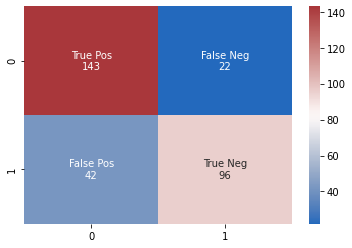

In [59]:
cf=confusion_matrix(original_result['target'],original_result['Prediction'])
names=['True Pos','False Neg','False Pos','True Neg']
group_counts=["{0:0.0f}".format(value) for value in cf.flatten()]
labels=[f"{v1}\n{v2}" for v1,v2 in zip(names,group_counts)]
labels= np.asarray(labels).reshape(2,2)
sns.heatmap(cf,annot=labels,fmt='',cmap="vlag")